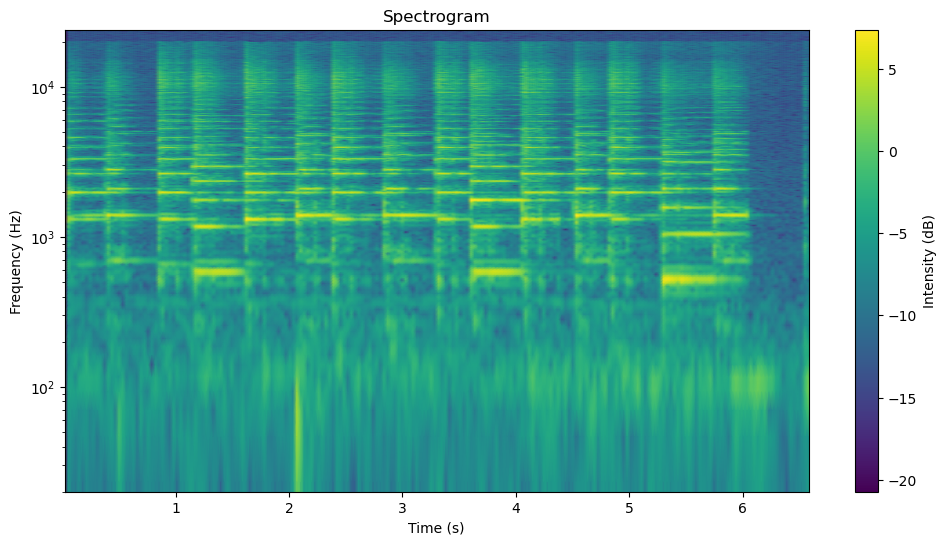

filter applied.

Spectrogram after noise reduction:


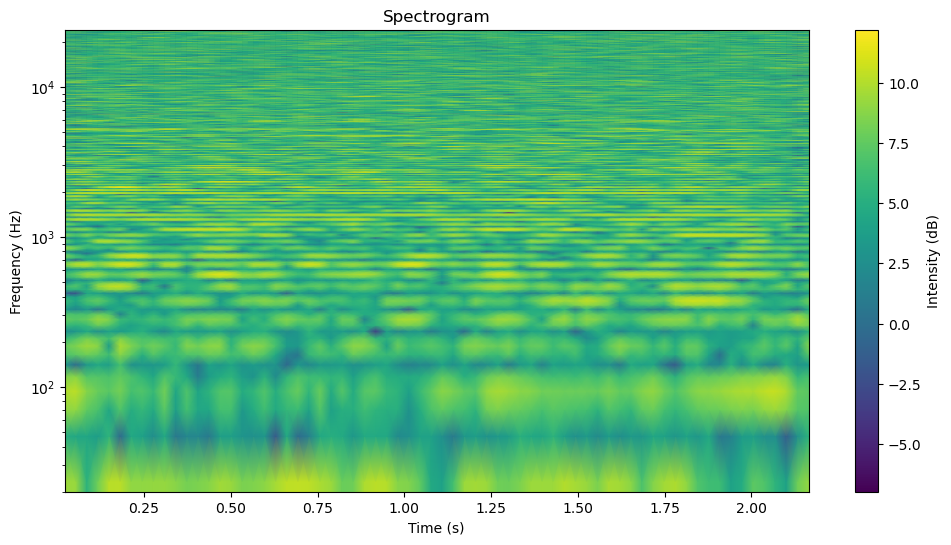

High energy moments:
Time: 2.00 s, Energy: -30.73
Time: 5.90 s, Energy: -34.34
Time: 1.20 s, Energy: -35.52
Time: 4.30 s, Energy: -36.05
Time: 6.00 s, Energy: -37.37
Time: 3.30 s, Energy: -38.10
Time: 5.20 s, Energy: -38.40
Time: 1.10 s, Energy: -39.48
Time: 3.20 s, Energy: -39.61
Time: 6.20 s, Energy: -40.04


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows, savgol_filter, wiener
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

def create_spectrogram(audio_file, window='hann', n_fft=2048, hop_length=512, log_scale=True):
    try:
        sample_rate, audio_data = wavfile.read(audio_file)
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]
    except Exception as e:
        print(f"Error reading file: {e}..")
        try:
            audio_data, sample_rate = librosa.load(audio_file, sr=None)
        except Exception as e2:
            print(f"Error with librosa: {e2}.")
            return

    window_func = windows.get_window(window, n_fft)

    frequencies, times, spectrogram_data = spectrogram(audio_data,fs=sample_rate,window=window_func,nperseg=n_fft,noverlap=hop_length,detrend=False)

    if log_scale:
        spectrogram_data = np.log(spectrogram_data + 1e-9)

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, spectrogram_data, shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    if log_scale:
        plt.yscale('log')

    plt.ylim(20, sample_rate / 2)
    plt.savefig("spectrogram.png")
    plt.show()

    return sample_rate, audio_data, spectrogram_data, frequencies, times

def noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener'):
    if method == 'wiener':
        filtered_audio = wiener(audio_data)
        print("filter applied.")

    elif method == 'savgol':
        filtered_spectrogram = savgol_filter(spectrogram_data, window_length=15, polyorder=3, axis=1)
        filtered_audio = librosa.istft(filtered_spectrogram, hop_length=512)
        print("filter applied.")

    else:
        print("Unknown method.")
        return audio_data

    filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

    sf.write("filtered_audio.wav", filtered_audio, sample_rate)
    #print("Filtered audio saved to filtered_audio.wav")

    return filtered_audio

def find_high_energy_moments(spectrogram_data, times, frequencies, delta_t=0.1, delta_f=45):
    high_energy_moments = []
    num_time_windows = int(times[-1] / delta_t)

    for i in range(num_time_windows):
        start_time = i * delta_t
        end_time = start_time + delta_t

        time_indices = np.where((times >= start_time) & (times < end_time))[0]
        freq_indices = np.where(frequencies <= delta_f)[0]

        spectrogram_subset = spectrogram_data[freq_indices[:, None], time_indices]
        total_energy = np.sum(spectrogram_subset)

        high_energy_moments.append((start_time, total_energy))

    high_energy_moments.sort(key=lambda x: x[1], reverse=True)

    print("High energy moments:")
    for time, energy in high_energy_moments[:10]:
        print(f"Time: {time:.2f} s, Energy: {energy:.2f}")

    return high_energy_moments

def main():
    audio_file = "piano.wav"
    sample_rate, audio_data, spectrogram_data, frequencies, times = create_spectrogram(audio_file, log_scale=True)
    filtered_audio = noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='savgol')
    print("\nSpectrogram after noise reduction:")
    create_spectrogram("filtered_audio.wav", log_scale=True)
    high_energy_moments = find_high_energy_moments(spectrogram_data, times, frequencies)
    ##find_high_energy_moments(10 * np.log10(spectrogram_data / np.max(spectrogram_data + 1e-9)), times, frequencies)

if __name__ == "__main__":
    main()

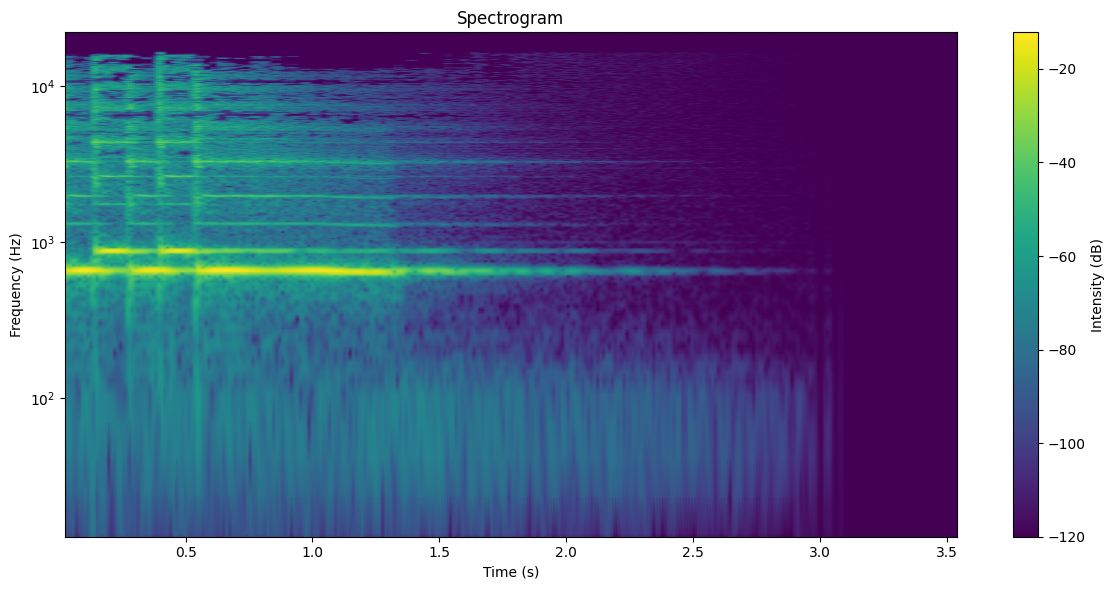

Savitzky-Golay filter applied.
Filtered audio saved to filtered_audio.wav

Spectrogram after noise reduction:


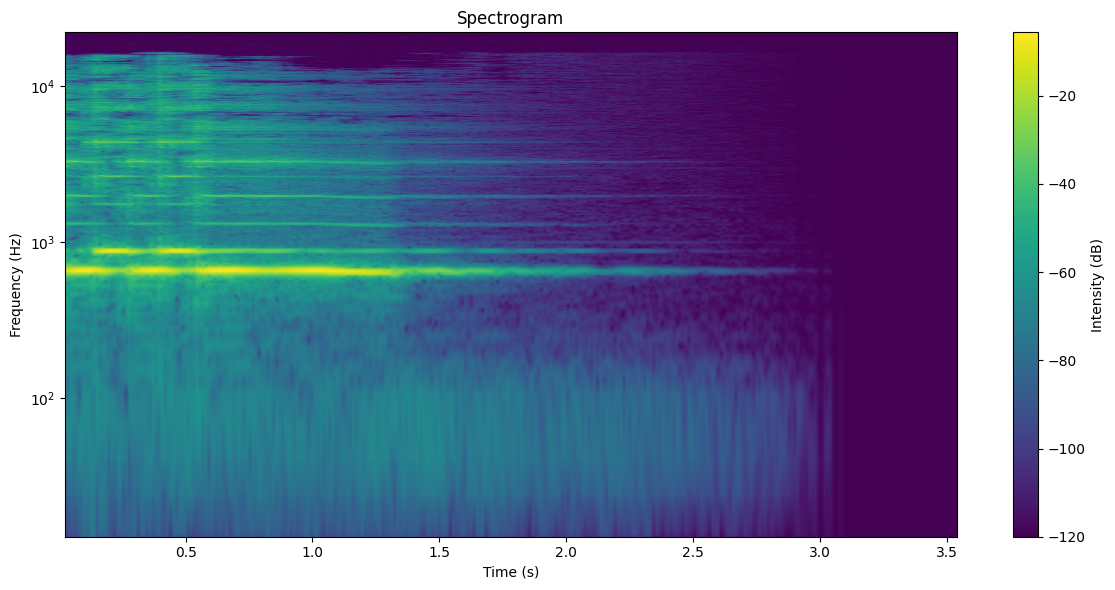


Top 10 high energy moments:
Time: 0.53s | Energy: -42497.42
Time: 0.35s | Energy: -43082.46
Time: 0.44s | Energy: -43413.69
Time: 0.26s | Energy: -43653.05
Time: 0.16s | Energy: -43703.39
Time: 0.07s | Energy: -44108.30
Time: 0.63s | Energy: -44753.43
Time: 0.72s | Energy: -46208.70
Time: 0.81s | Energy: -47489.00
Time: 0.91s | Energy: -48540.96


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows, savgol_filter, wiener
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

def create_spectrogram(audio_file, window='hann', n_fft=2048, hop_length=512, log_scale=True):
    try:
        sample_rate, audio_data = wavfile.read(audio_file)
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]
    except Exception as e:
        print(f"Error reading file: {e}.")
        try:
            audio_data, sample_rate = librosa.load(audio_file, sr=None)
        except Exception as e2:
            print(f"Error with librosa: {e2}.")
            return

    window_func = windows.get_window(window, n_fft)

    frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate, window=window_func, nperseg=n_fft,noverlap=hop_length,detrend=False )

    if log_scale:
        spectrogram_data = np.log(spectrogram_data + 1e-9)

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, spectrogram_data, shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    if log_scale:
        plt.yscale('log')

    plt.ylim(20, sample_rate / 2)
    plt.savefig("spectrogram.png")
    plt.show()

    return sample_rate, audio_data, spectrogram_data, frequencies, times

def noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener'):
    if method == 'wiener':
        filtered_audio = wiener(audio_data)
        print("Wiener filter applied.")

    elif method == 'savgol':
        filtered_spectrogram = savgol_filter(spectrogram_data, window_length=15, polyorder=3, axis=1)
        filtered_audio = librosa.istft(filtered_spectrogram, hop_length=512)
        print("Savitzky-Golay filter applied.")

    else:
        print("Unknown method.")
        return audio_data

    filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

    sf.write("filtered_audio.wav", filtered_audio, sample_rate)
    print("Filtered audio saved to filtered_audio.wav")

    return filtered_audio

def find_high_energy_moments(spectrogram_data, times, frequencies, delta_t=0.1, delta_f=45):
    high_energy_moments = []
    num_time_windows = int(times[-1] / delta_t)

    for i in range(num_time_windows):
        start_time = i * delta_t
        end_time = start_time + delta_t

        time_indices = np.where((times >= start_time) & (times < end_time))[0]
        freq_indices = np.where(frequencies <= delta_f)[0]

        spectrogram_subset = spectrogram_data[freq_indices[:, None], time_indices]
        total_energy = np.sum(spectrogram_subset)

        high_energy_moments.append((start_time, total_energy))

    high_energy_moments.sort(key=lambda x: x[1], reverse=True)

    print("High energy moments:")
    for time, energy in high_energy_moments[:10]:
        print(f"Time: {time:.2f} s, Energy: {energy:.2f}")

    return high_energy_moments

def main():
    audio_file = "baraban.wav"
    sample_rate, audio_data, spectrogram_data, frequencies, times = create_spectrogram(audio_file, log_scale=True)
    filtered_audio = noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='savgol')
    print("\nSpectrogram after noise reduction:")
    create_spectrogram("filtered_audio.wav", log_scale=True)
    high_energy_moments = find_high_energy_moments(spectrogram_data, times, frequencies)

if __name__ == "__main__":
    main()

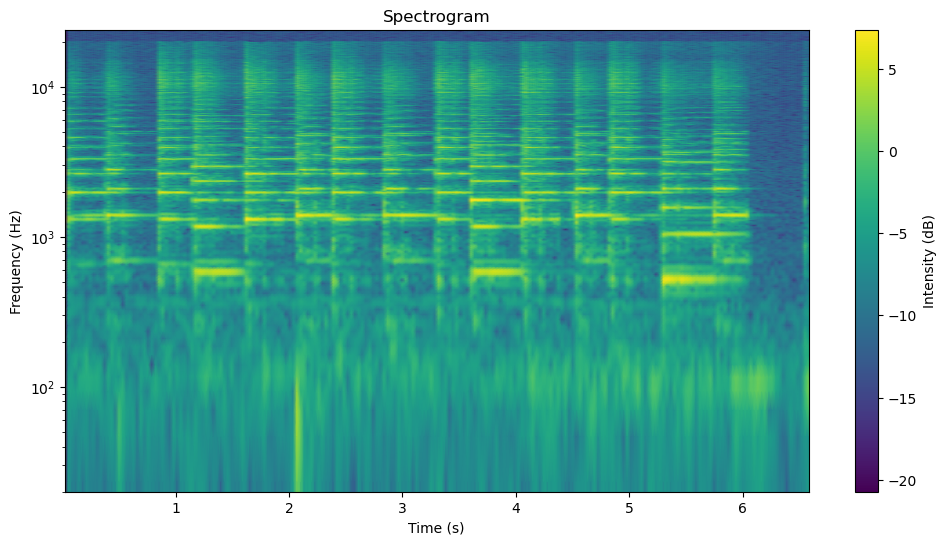

C:\Users\79258\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
C:\Users\79258\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
C:\Users\79258\AppData\Local\Temp\ipykernel_24320\4201610017.py:59: RuntimeWarning: invalid value encountered in cast
  filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)


Wiener filter applied.
Filtered audio saved to filtered_audio.wav

Spectrogram after noise reduction:


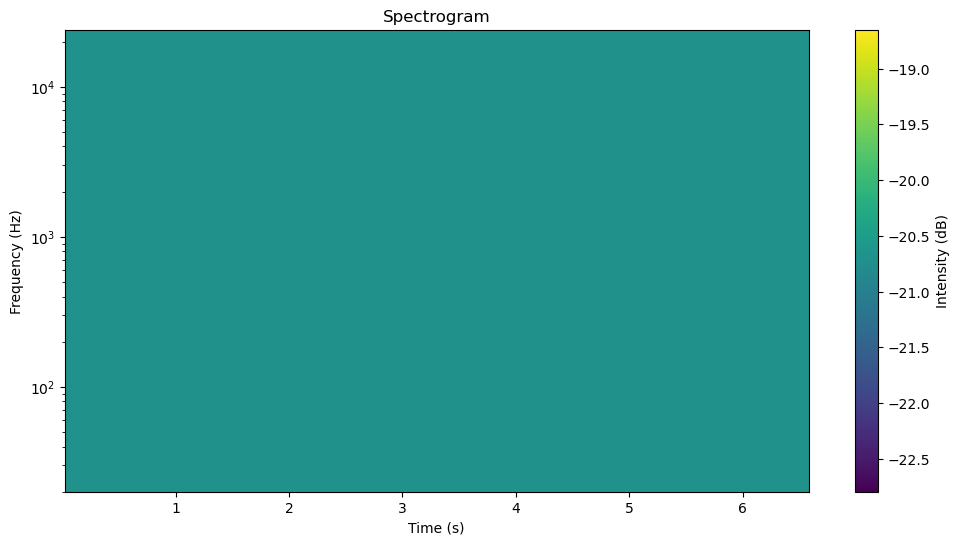

High energy moments:
Time: 2.00 s, Energy: -30.73
Time: 5.90 s, Energy: -34.34
Time: 1.20 s, Energy: -35.52
Time: 4.30 s, Energy: -36.05
Time: 6.00 s, Energy: -37.37
Time: 3.30 s, Energy: -38.10
Time: 5.20 s, Energy: -38.40
Time: 1.10 s, Energy: -39.48
Time: 3.20 s, Energy: -39.61
Time: 6.20 s, Energy: -40.04


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, windows, savgol_filter, wiener
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

def create_spectrogram(audio_file, window='hann', n_fft=2048, hop_length=512, log_scale=True):
    try:
        sample_rate, audio_data = wavfile.read(audio_file)
        if len(audio_data.shape) > 1:
            audio_data = audio_data[:, 0]
    except Exception as e:
        print(f"Error reading file: {e}. Trying librosa.")
        try:
            audio_data, sample_rate = librosa.load(audio_file, sr=None)
        except Exception as e2:
            print(f"Error with librosa: {e2}.")
            return

    window_func = windows.get_window(window, n_fft)

    frequencies, times, spectrogram_data = spectrogram(audio_data,fs=sample_rate,window=window_func,nperseg=n_fft,noverlap=hop_length,detrend=False)

    if log_scale:
        spectrogram_data = np.log(spectrogram_data + 1e-9)

    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, spectrogram_data, shading='gouraud')
    plt.colorbar(label='Intensity (dB)')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    if log_scale:
        plt.yscale('log')

    plt.ylim(20, sample_rate / 2)
    plt.savefig("spectrogram.png")
    plt.show()

    return sample_rate, audio_data, spectrogram_data, frequencies, times

def noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener'):
    if method == 'wiener':
        filtered_audio = wiener(audio_data)
        print("Wiener filter applied.")

    elif method == 'savgol':
        filtered_spectrogram = savgol_filter(spectrogram_data, window_length=15, polyorder=3, axis=1)
        filtered_audio = librosa.istft(filtered_spectrogram, hop_length=512)
        print("Savitzky-Golay filter applied.")

    else:
        print("Unknown method.")
        return audio_data

    filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)

    sf.write("filtered_audio.wav", filtered_audio, sample_rate)
    print("Filtered audio saved to filtered_audio.wav")

    return filtered_audio

def find_high_energy_moments(spectrogram_data, times, frequencies, delta_t=0.1, delta_f=45):
    high_energy_moments = []
    num_time_windows = int(times[-1] / delta_t)

    for i in range(num_time_windows):
        start_time = i * delta_t
        end_time = start_time + delta_t

        time_indices = np.where((times >= start_time) & (times < end_time))[0]
        freq_indices = np.where(frequencies <= delta_f)[0]

        spectrogram_subset = spectrogram_data[freq_indices[:, None], time_indices]
        total_energy = np.sum(spectrogram_subset)

        high_energy_moments.append((start_time, total_energy))

    high_energy_moments.sort(key=lambda x: x[1], reverse=True)

    print("High energy moments:")
    for time, energy in high_energy_moments[:10]:
        print(f"Time: {time:.2f} s, Energy: {energy:.2f}")

    return high_energy_moments

def main():
    audio_file = "piano.wav"
    sample_rate, audio_data, spectrogram_data, frequencies, times = create_spectrogram(audio_file, log_scale=True)
    filtered_audio = noise_reduction(audio_data, sample_rate, spectrogram_data, frequencies, times, method='wiener')
    print("\nSpectrogram after noise reduction:")
    create_spectrogram("filtered_audio.wav", log_scale=True)
    high_energy_moments = find_high_energy_moments(spectrogram_data, times, frequencies)

if __name__ == "__main__":
    main()